In [1]:
import numpy as np
import pandas as pd

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

# Calculating Probabilities and Plotting Distributions

## Permutation and combination

In [3]:
# import for permutation and combination
from itertools import permutations, combinations, combinations_with_replacement 
from scipy.special import comb, perm

In [180]:
comb(8,2, repetition = False), perm(3,3)

(28.0, 6.0)

In [23]:
seq = permutations([1, 2, 3])
for i in seq:
    print(i)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [25]:
seq = permutations(['A', 'B'])
for i in seq:
    print(i)

('A', 'B')
('B', 'A')


In [33]:
seq = permutations("ABC", 3)
for p in list(seq):  
    print(p)

('A', 'B', 'C')
('A', 'C', 'B')
('B', 'A', 'C')
('B', 'C', 'A')
('C', 'A', 'B')
('C', 'B', 'A')


In [174]:
com = combinations("ABC", 2)
for c in com:
    print(c)

('A', 'B')
('A', 'C')
('B', 'C')


In [181]:
com = combinations_with_replacement('ABC', 2)  
i=0
for c in com:
    i+=1
    print(c)
print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'B')
('B', 'C')
('C', 'C')
6


## Hypergeometric Distribution

Selecting n objects at random without replacement from a set composed of two types of objects

<strong>Ques.</strong> Suppose that 10000 lines of code have 30 lines which could beimproved (for example by clarification of purpose, simplification ordocumentation). If a random sample of 10 lines of code is taken,what is the chance that:(a) 1 or(b) 0lines of the code sampled could be improved?

In [4]:
from scipy.stats import hypergeom

In [5]:
[M, n, N] = [10000, 30, 10]
rv1 = hypergeom(M, n, N)
rv2 = hypergeom(100, n, N)
rv3 = hypergeom(50, n, N)
# The probability of 0 lines, # The probability of 1 lines
rv1.pmf(0), rv1.pmf(1)

(0.9703886288726258, 0.02922563885658677)

In [142]:
# The probability of at most 1 lines
hypergeom.cdf(1, M, n, N)

0.9996142677292126

In [143]:
# Random Number generation

print(hypergeom.rvs(20, 7, 12, size=10))
print(np.random.hypergeometric(7, 13, 12, 10))

[4 6 6 5 4 2 4 4 3 5]
[1 2 3 6 4 4 2 4 4 5]


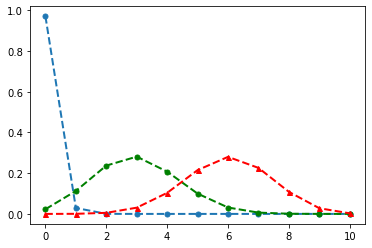

In [145]:
x = np.arange(11)
plt.plot(x, rv1.pmf(x), marker='o', linestyle='dashed', 
         linewidth=2, markersize=5)
plt.plot(x, rv2.pmf(x), color = 'green', marker='o', linestyle='dashed', 
         linewidth=2, markersize=5)
plt.plot(x, rv3.pmf(x), color = 'red', marker='^', linestyle='dashed', 
         linewidth=2, markersize=5)

## Binomial Distribution

Number of successes in a sequence of n Bernoulli trials, p = P (success)

In [12]:
from scipy.stats import binom, norm

In [154]:
y1 = binom(40, 0.1)
y2 = binom(40, 0.5)
y3 = binom(40, 0.7)
y4 = binom(40, 0.9)

In [155]:
x = np.arange(41)

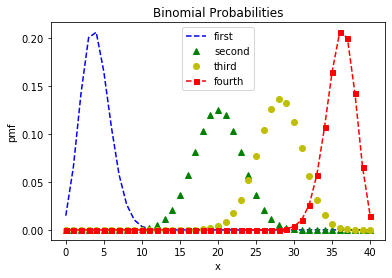

In [166]:
plt.plot(x, y1.pmf(x), '--b')
plt.plot(x, y2.pmf(x), '^g')
plt.plot(x, y3.pmf(x), 'oy')
plt.plot(x, y4.pmf(x), 'sr', markersize=5, linestyle = 'dashed')
plt.ylabel('pmf')
plt.xlabel('x')
plt.title('Binomial Probabilities')
plt.legend( ['first', 'second', 'third', 'fourth'])

In [7]:
hypergeom(20, 3, 3).pmf(3)

0.0008771929824561416

In [173]:
#n is the number of trials
#p is the probability of success in each trial
#m3 is skewness (1st column)
#m4 is kurtosis (2nd column)

def m34binomial(n, p):
    q = 1-p
    den = n*q*p
    m3 = (q-p)/np.sqrt(den)
    m4 = 3 + (1-6*p*q)/den
    return (m3, m4)

def m34negbinomial(r, p):
    q = 1-p
    qr = q*r
    m3 = (1+q)/np.sqrt(qr)
    m4 = 3 + 6/r + p**2/qr
    return (m3, m4)

In [172]:
m34binomial(10000,0.1), 

(0.02666666666666667, 3.000511111111111)

In [181]:
m34negbinomial(np.array([50, 20, 40, 30]), p = 0.1)

(array([0.28323528, 0.44783429, 0.31666667, 0.36565517]),
 array([3.12022222, 3.30055556, 3.15027778, 3.20037037]))

In [8]:
random.seed(2)

In [11]:
n = 10**6
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
W = np.sum(x**2 + y**2 <1)
est = W/250000
est

3.141324

In [267]:
error = abs(est - np.pi)
print(f"Approximation error is: {error}")

Approximation error is: 8.865358979326388e-05


In [283]:
def rW(size, n = 10**6):
    W = np.zeros((1, size))
    for i in range(size):
        x = np.random.uniform(0, 1, n)
        y = np.random.uniform(0, 1, n)
        W[0][i]= np.sum(x**2 + y**2 <1)
    return W

In [284]:
W = rW(50)

In [17]:
est = np.mean(W)/250000
error = abs(est - np.pi)
print(f"Refined approximation error is: {error}")
est

Refined approximation error is: 0.0002686535897931108


3.141324

In [54]:
x = norm(3, 4).rvs(500)

In [59]:
np.mean(x), np.var(x)

(2.8333397607513913, 15.85738121194428)

In [121]:
def simf():
    W = norm(15, np.sqrt(116)).rvs(100)
    return (np.mean(W), np.var(W))
        

In [122]:
w = np.zeros((1000,2))
for i in range(1000):
    w[i] = simf()

In [123]:
np.mean(w[:, 0]), np.mean(w[:, 1])

(15.02759740380367, 115.37977740568124)

In [124]:
np.var(w[:, 0]), np.var(w[:, 1])

(1.1998002282307956, 259.94408685666735)

C:\Users\sadhna kunj\Miniconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


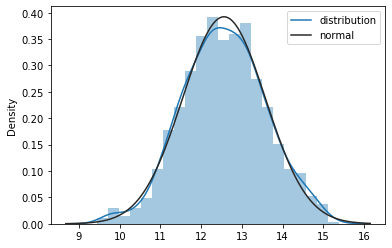

In [136]:
sns.distplot((w[:, 0] - 1.5)/np.sqrt(1.16), kde = True, fit = norm)
plt.legend(['distribution', 'normal'])

In [152]:
def genf(n):
    u = np.random.uniform(size = n)
    x = u**(1/3)
    return x

In [193]:
X = genf(10000)
pr= np.mean(((X<0.8) & (X>0.6)))

In [194]:
pr

0.2978

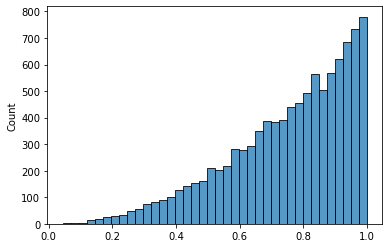

In [171]:
sns.histplot(X)

## Distributions and random numbers

In [195]:
x = np.arange(-5, 5.1, 0.1)
y = norm().pdf(x)

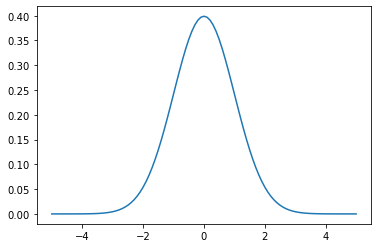

In [196]:
# pdf Normal Distribution with mean = 0 and sd = 1

plt.plot(x, y)

In [205]:
x = np.arange(-12, 12.1, 0.1, float)
y = norm().cdf(x)

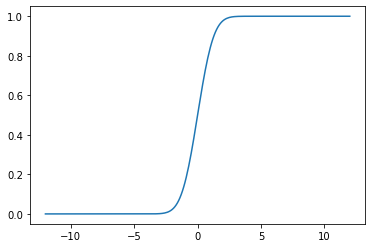

In [201]:
# cdf of Normal Dist with mean = 0, sd = 1

plt.plot(x, y)

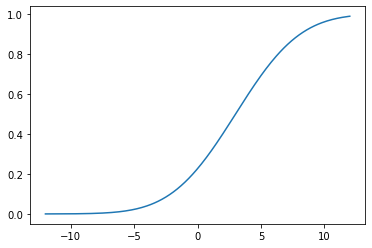

In [202]:
# cdf of Normal Dist with mean = 3, sd = 4

plt.plot(x, norm(3, 4).cdf(x))

In [217]:
# ppf() is the inverse of cdf()
# The idea behind ppf() is that you give it a probability, and it returns the number whose cumulative distribution matches the probability

norm(1, 2).ppf([0.25, 0.5, 0.75])

array([-0.3489795,  1.       ,  2.3489795])

In [218]:
x = np.arange(0, 1, 0.05)
y = norm().ppf(x)

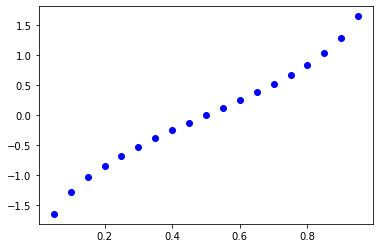

In [220]:
plt.plot(x, y, 'ob')

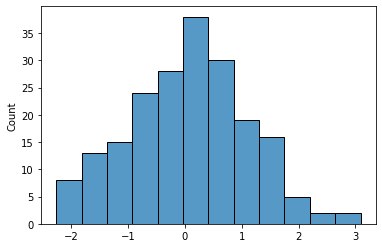

In [233]:
# Generate 200 normal random variables and plot

y =  norm().rvs(200)
sns.histplot(y)

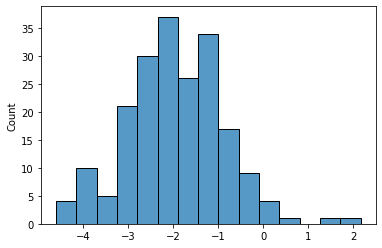

In [235]:
# Generate 200 normal random variables and plot

y =  norm(loc = -2).rvs(200)
sns.histplot(y)

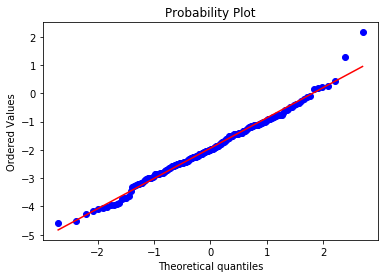

In [239]:
stats.probplot(y, plot = plt)
plt.show()

## Quantile - Quantile plot

ppplot : Probability-Probability plot Compares the sample and theoretical probabilities (percentiles).

qqplot : Quantile-Quantile plot Compares the sample and theoretical quantiles

probplot : Probability plot Same as a Q-Q plot, however probabilities are shown in the scale of the theoretical distribution (x-axis) and the y-axis contains unscaled quantiles of the sample data.

In [240]:
import statsmodels.api as sm
import pylab as py

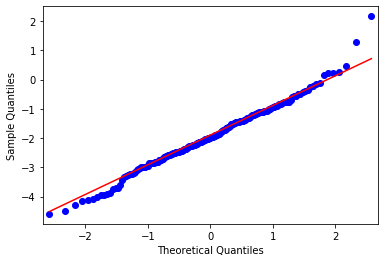

In [250]:
# l = {'45', 's', 'r', q'}
'''
    If fit is false, loc, scale, and distargs are passed to the
    distribution. If fit is True then the parameters for dist
    are fit automatically using dist.fit. The quantiles are formed
    from the standardized data, after subtracting the fitted loc
    and dividing by the fitted scale.
'''

sm.qqplot(y, line ='q')
plt.show()

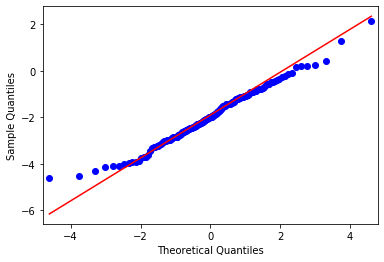

In [298]:
sm.qqplot(y, stats.t, distargs = (4,), line = 'q')
plt.show()